# KNN Classification: XOR Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
class KNNClassifier():
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon = 1e-2):
        N, D = X.shape
        y_hat = np.empty(N)
    
        for i in range(N):
            sq_dist = np.sum((X - self.X[i])**2, axis = 1) #(self.X - X[1])  self.X NxD difference row wise results in an N dim array
            idx = sq_dist.argsort()[:K] #returns the idx of K in ascending order
            gamma = 1 / (np.sqrt(sq_dist[idx]) + epsilon)
            y_hat[i] = np.bincount(self.y[idx], weights = gamma).argmax() #providing the highest weighted count
        
        return y_hat
    
    def accuracy(self, X, y, K, epsilon = 1e-2):
        y_hat = self.predict(X, K, epsilon)
        return np.mean(y == y_hat)

In [4]:
#Import data file
data = pd.read_csv("xor.csv")

In [5]:
data.head()

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0


In [7]:
#Divide data into variables and target
X = data.drop(['y'], axis=1).to_numpy()
y = data['y'].to_numpy()

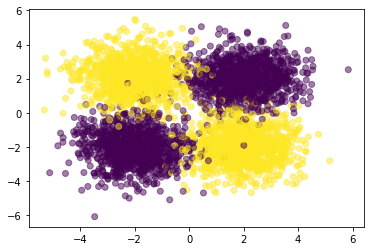

In [15]:
#Plot the variables and target
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

In [11]:
def shuffle(*args):
    """Take multiple arrays of the same length and shuffle row-wise"""
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

In [12]:
#Shuffle data
X, y = shuffle(X, y)

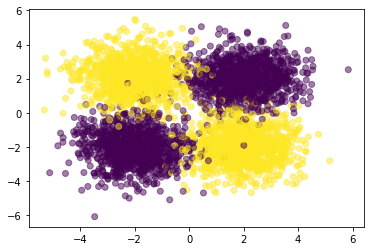

In [13]:
#Plot data
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

In [14]:
#Instantiate model, fit data, print accuracy
knn = KNNClassifier()
knn.fit(X, y)
print(f"Accuarcy: {knn.accuracy(X, y, 5)}")

Accuarcy: 0.99975


The XOR data isn't linearly separable and therefore a linear model would not accurately classify the data. The KNN Classification model does a great job separating the classes. Since KNN is a memory-based algorithm, classification is easy and accurate.